In [1]:
import numpy as np
import string
import pandas as pd
import seaborn as sns
import nltk
import keras
from matplotlib import pyplot as plt

from sklearn import random_projection
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import SGD
from keras import metrics

Using TensorFlow backend.


In [2]:
def load_data(file_name):
    file_data = pd.read_csv(file_name)
    return file_data

In [3]:
columns = ['business_id', 'cool', 'date', 'funny', 'review_id'
           'stars', 'text', 'useful', 'user_id']

base_path = "data/"
test_path = base_path + "test.csv"
valid_path = base_path + "valid.csv"
train_path = base_path + "train.csv"
test_data = load_data(test_path)
train_data = load_data(train_path)
valid_data = load_data(valid_path)
print("DATA LOADED")

DATA LOADED


In [4]:
print(train_data.dtypes)

business_id     object
cool             int64
date            object
funny            int64
review_id       object
stars          float64
text            object
useful           int64
user_id         object
dtype: object


In [5]:
print(train_data.head(3))

              business_id  cool                 date  funny  \
0  dsvFUqrhytVmKXCW7bKNhA     0  2013-03-10 01:24:07      0   
1  6YrO-hJNof4wsx4f0YQ8yg     0  2014-12-22 17:06:23      0   
2  LtyoPfxpvcF_9e9wMoUi0w     0  2016-04-25 09:55:57      0   

                review_id  stars  \
0  58nqw-MdO6EDACPaKDM59Q    5.0   
1  eVeQtMGaB5tdCH0hKJwxKw    3.0   
2  AHMHUbq0eAUOuOPFoeO5iw    4.0   

                                                text  useful  \
0  As a student, by back and neck are under const...       0   
1  Stayed here for a football game at University ...       0   
2  Very good salads, generous portions. I either ...       1   

                  user_id  
0  1NImHsg1kc76n_cQyTm0bg  
1  Oi0G3jFm2jtG2W02dZTdEQ  
2  4jbz7cOVuV_Q7v2b3pNrLw  


In [6]:
drop_list = ['business_id', 'review_id', 'user_id']
train_data = train_data.drop(drop_list, axis=1)
test_data = test_data.drop(drop_list, axis=1)
valid_data = valid_data.drop(drop_list, axis=1)
print(train_data.head(3))

   cool                 date  funny  stars  \
0     0  2013-03-10 01:24:07      0    5.0   
1     0  2014-12-22 17:06:23      0    3.0   
2     0  2016-04-25 09:55:57      0    4.0   

                                                text  useful  
0  As a student, by back and neck are under const...       0  
1  Stayed here for a football game at University ...       0  
2  Very good salads, generous portions. I either ...       1  


In [15]:
train_useful_data = train_data['useful']
test_useful_data = test_data['useful']
train_cool_data = train_data['cool']
test_cool_data = test_data['cool']
train_funny_data = train_data['funny']
test_funny_data = test_data['funny']

train_star_data = train_data['stars']
test_star_data = test_data['stars']

train_text_data = train_data['text']
test_text_data = test_data['text']

TRAIN COOL DATA
MAX: 133, MIN: 0
MEAN: 0.586180, SD: 2.457709

TEST COOL DATA
MAX: 90, MIN: 0
MEAN: 0.571300, SD: 2.198026


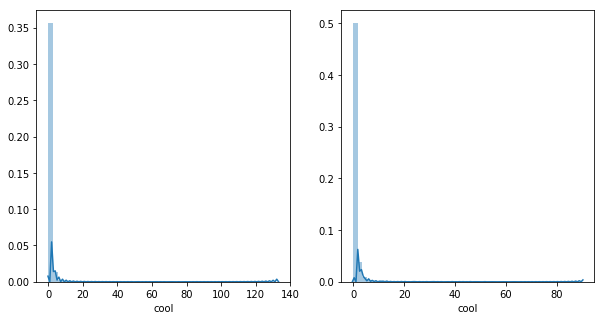

In [7]:


print("TRAIN COOL DATA")
print("MAX: %d, MIN: %d" % (np.max(train_cool_data), np.min(train_cool_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_cool_data), np.std(train_cool_data)))
print()
print("TEST COOL DATA")
print("MAX: %d, MIN: %d" % (np.max(test_cool_data), np.min(test_cool_data)))
print("MEAN: %f, SD: %f" % (np.mean(test_cool_data), np.std(test_cool_data)))

fig, axs = plt.subplots(figsize=(10,5), ncols=2)
sns.distplot(train_cool_data, ax=axs[0])
sns.distplot(test_cool_data, ax=axs[1])

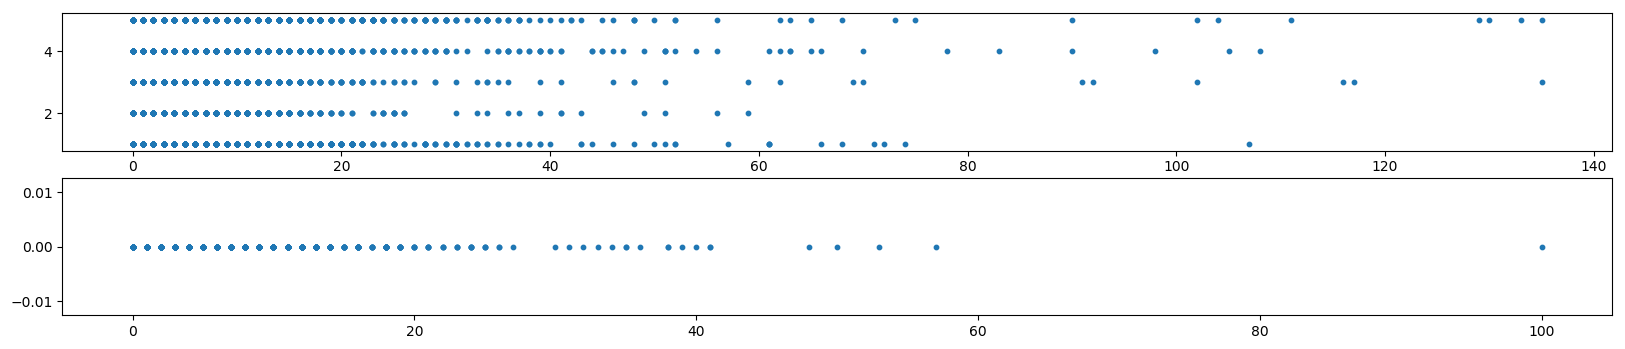

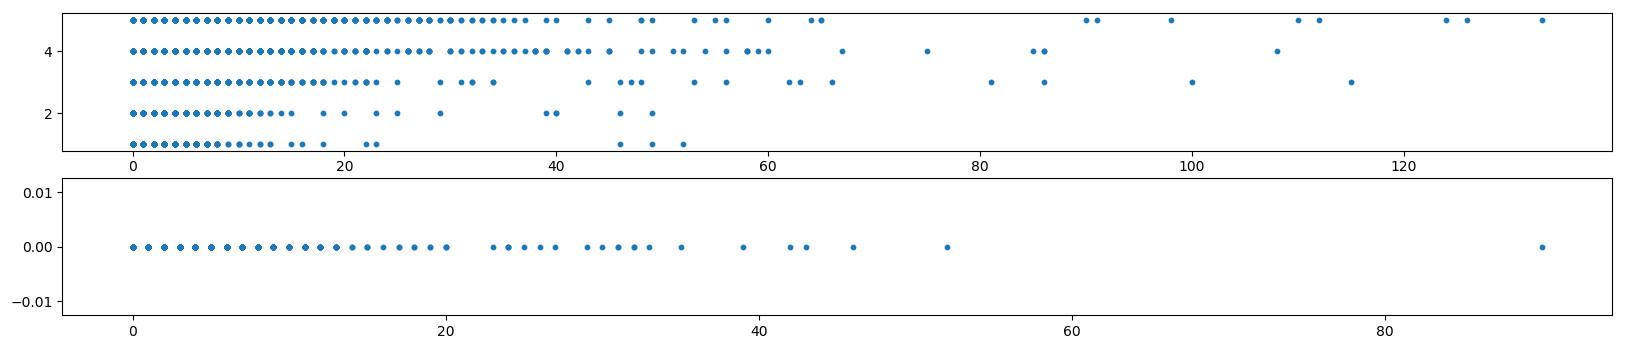

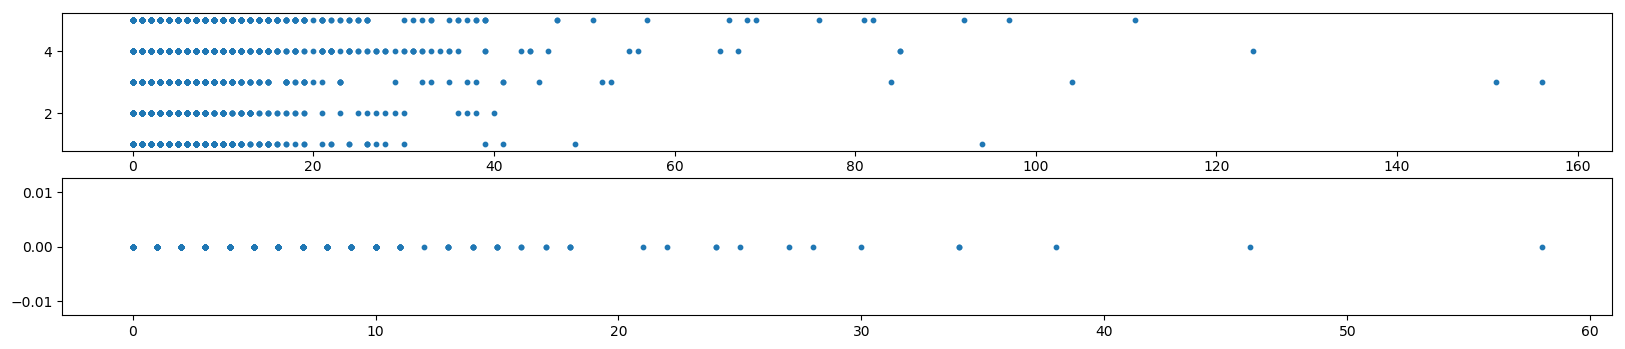

In [16]:
plt.figure(num=1, figsize=(20, 4), dpi=100)
plt.subplot(211)
plt.scatter(train_useful_data, train_star_data, s=10)
plt.subplot(212)
plt.scatter(test_useful_data, test_star_data, s=10)
plt.show()
print()
plt.figure(num=1, figsize=(20, 4), dpi=100)
plt.subplot(211)
plt.scatter(train_cool_data, train_star_data, s=10)
plt.subplot(212)
plt.scatter(test_cool_data, test_star_data, s=10)
plt.show()
print()
plt.figure(num=1, figsize=(20, 4), dpi=100)
plt.subplot(211)
plt.scatter(train_funny_data, train_star_data, s=10)
plt.subplot(212)
plt.scatter(test_funny_data, test_star_data, s=10)
plt.show()

TRAIN COOL DATA
MAX: 5, MIN: 0
MEAN: 0.456030, SD: 1.014222

TEST COOL DATA
MAX: 5, MIN: 0
MEAN: 0.451200, SD: 0.992683


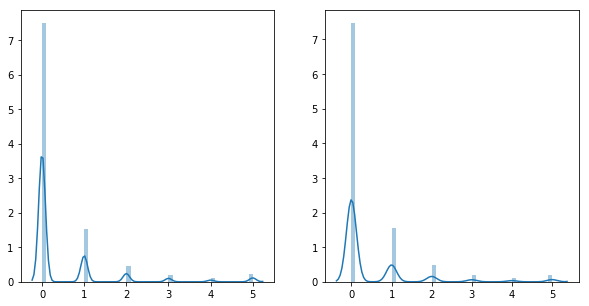

In [9]:
limit = 5
train_cool_data = np.where(train_cool_data> limit, limit, train_cool_data)
test_cool_data = np.where(test_cool_data> limit, limit, test_cool_data)

print("TRAIN COOL DATA")
print("MAX: %d, MIN: %d" % (np.max(train_cool_data), np.min(train_cool_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_cool_data), np.std(train_cool_data)))
print()
print("TEST COOL DATA")
print("MAX: %d, MIN: %d" % (np.max(test_cool_data), np.min(test_cool_data)))
print("MEAN: %f, SD: %f" % (np.mean(test_cool_data), np.std(test_cool_data)))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(train_cool_data, ax=axs[0])
sns.distplot(test_cool_data, ax=axs[1])

y = 0.112560x + 3.667319


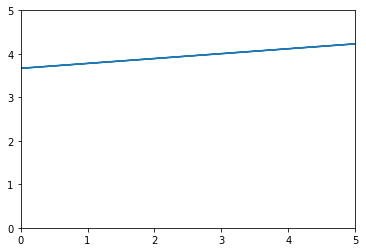

In [10]:
from sklearn import linear_model
import numpy as np

np_x = np.array(train_cool_data)
regr = linear_model.LinearRegression()
regr.fit(train_cool_data.reshape(-1, 1), train_data['stars'])
print("y = %fx + %f" % (regr.coef_, regr.intercept_))

x = train_cool_data
p = np.polyfit(x, train_data['stars'], deg=1)
y = p[1] + p[0] * x
plt.plot(x, y)
plt.xlabel='Cool'
plt.ylabel='Stars'
plt.title = "Stars vs Cool"
plt.axis([0, 5, 0, 5])
plt.show()

In [11]:
train_date_data = pd.to_datetime(train_data['date'], yearfirst=True)
test_date_data = pd.to_datetime(test_data['date'], yearfirst=True)

print("TRAIN DATE DATA")
print("MAX: %s, MIN: %s" % (np.max(train_date_data), np.min(train_date_data)))
# print("MEAN: %s, SD: %s" % (avg_datetime(train_date_data), np.std(train_date_data)))
print()
print("TEST DATE DATA")
print("MAX: %s, MIN: %s" % (np.max(test_date_data), np.min(test_date_data)))
# print("MEAN: %s, SD: %s" % (np.mean(test_date_data), np.std(test_date_data)))

TRAIN DATE DATA
MAX: 2018-11-14 16:49:52, MIN: 2005-03-03 19:49:39

TEST DATE DATA
MAX: 2018-11-14 16:22:29, MIN: 2005-10-16 03:44:12


Text(0.5, 1.0, 'MINUTE')

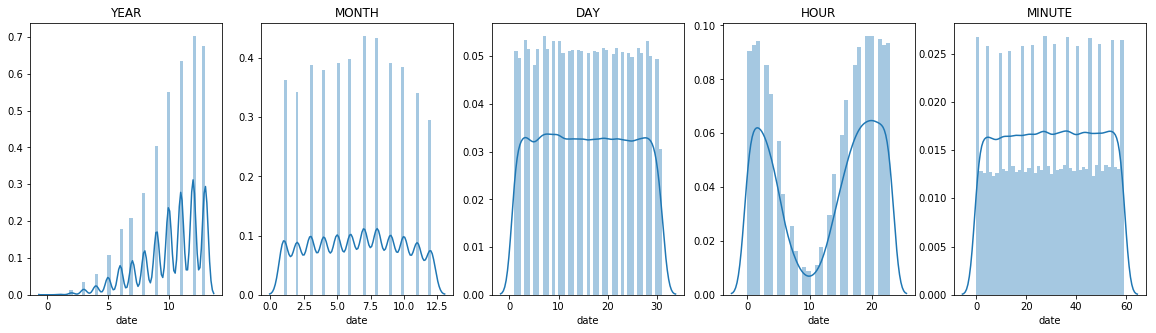

In [12]:
train_date_year = train_date_data.dt.year - 2005
train_date_month = train_date_data.dt.month
train_date_day = train_date_data.dt.day
train_date_hour = train_date_data.dt.hour
train_date_minute = train_date_data.dt.minute

fig, axs = plt.subplots(figsize=(20, 5), ncols=5)
sns.distplot(train_date_year, ax=axs[0]).set_title("YEAR")
sns.distplot(train_date_month, ax=axs[1]).set_title("MONTH")
sns.distplot(train_date_day, ax=axs[2]).set_title("DAY")
sns.distplot(train_date_hour, ax=axs[3]).set_title("HOUR")
sns.distplot(train_date_minute, ax=axs[4]).set_title("MINUTE")

y = 0.012850x + 3.588411


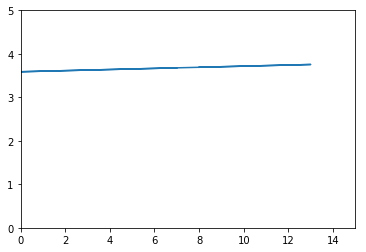

In [13]:
from sklearn import linear_model
import numpy as np

draw_data = train_date_year
np_x = np.array(draw_data)
regr = linear_model.LinearRegression()
regr.fit(np_x.reshape(-1, 1), train_data['stars'])
print("y = %fx + %f" % (regr.coef_, regr.intercept_))

x = draw_data
p = np.polyfit(x, train_data['stars'], deg=1)
y = p[1] + p[0] * x
plt.plot(x, y)
plt.axis([0, 15, 0, 5])
plt.show()

Text(0.5, 1.0, 'MINUTE')

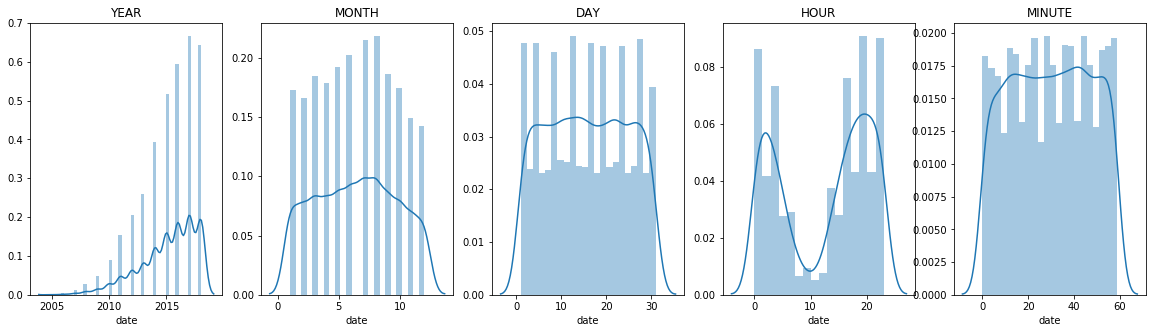

In [14]:
test_date_year = test_date_data.dt.year
test_date_month = test_date_data.dt.month
test_date_day = test_date_data.dt.day
test_date_hour = test_date_data.dt.hour
test_date_minute = test_date_data.dt.minute

fig, axs = plt.subplots(figsize=(20, 5), ncols=5)
sns.distplot(test_date_year, ax=axs[0]).set_title("YEAR")
sns.distplot(test_date_month, ax=axs[1]).set_title("MONTH")
sns.distplot(test_date_day, ax=axs[2]).set_title("DAY")
sns.distplot(test_date_hour, ax=axs[3]).set_title("HOUR")
sns.distplot(test_date_minute, ax=axs[4]).set_title("MINUTE")

TRAIN FUNNY DATA
MAX: 156, MIN: 0
MEAN: 0.493340, SD: 2.182310

TEST FUNNY DATA
MAX: 58, MIN: 0
MEAN: 0.452800, SD: 1.728112


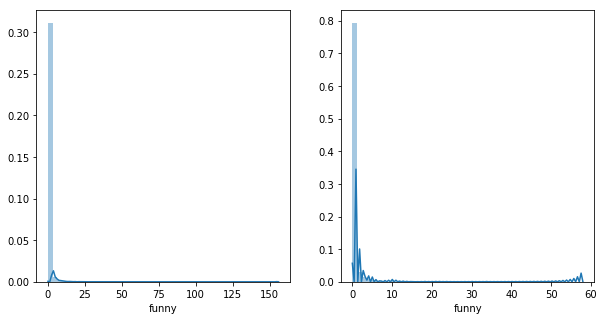

In [15]:
train_funny_data = train_data['funny']
test_funny_data = test_data['funny']

print("TRAIN FUNNY DATA")
print("MAX: %d, MIN: %d" % (np.max(train_funny_data), np.min(train_funny_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_funny_data), np.std(train_funny_data)))
print()
print("TEST FUNNY DATA")
print("MAX: %d, MIN: %d" % (np.max(test_funny_data), np.min(test_funny_data)))
print("MEAN: %f, SD: %f" % (np.mean(test_funny_data), np.std(test_funny_data)))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(train_funny_data, ax=axs[0])
sns.distplot(test_funny_data, ax=axs[1])

TRAIN FUNNY DATA
MAX: 5, MIN: 0
MEAN: 0.390360, SD: 0.969278

TEST FUNNY DATA
MAX: 5, MIN: 0
MEAN: 0.371300, SD: 0.932114


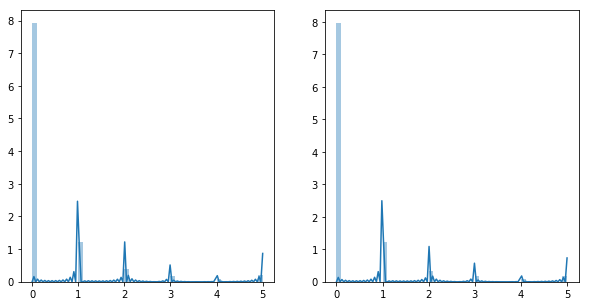

In [16]:
limit = 5
train_funny_data = np.where(train_funny_data> limit, limit, train_funny_data)
test_funny_data = np.where(test_funny_data> limit, limit, test_funny_data)

print("TRAIN FUNNY DATA")
print("MAX: %d, MIN: %d" % (np.max(train_funny_data), np.min(train_funny_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_funny_data), np.std(train_funny_data)))
print()
print("TEST FUNNY DATA")
print("MAX: %d, MIN: %d" % (np.max(test_funny_data), np.min(test_funny_data)))
print("MEAN: %f, SD: %f" % (np.mean(test_funny_data), np.std(test_funny_data)))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(train_funny_data, ax=axs[0])
sns.distplot(test_funny_data, ax=axs[1])

y = -0.161354x + 3.781636


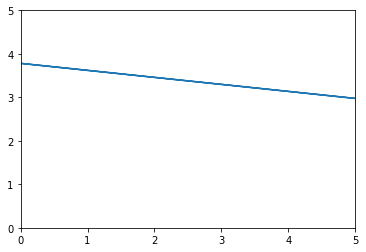

In [17]:
np_x = np.array(train_funny_data)
regr = linear_model.LinearRegression()
regr.fit(train_funny_data.reshape(-1, 1), train_data['stars'])
print("y = %fx + %f" % (regr.coef_, regr.intercept_))

x = train_funny_data
p = np.polyfit(x, train_data['stars'], deg=1)
y = p[1] + p[0] * x
plt.plot(x, y)
plt.xlabel='Funny'
plt.ylabel='Stars'
plt.title = "Stars vs Funny"
plt.axis([0, 5, 0, 5])
plt.show()

TRAIN STARS DATA
MAX: 5, MIN: 1
MEAN: 3.718650, SD: 1.461825

Proportion of Stars in Valid
Proportion of 1: 0.149100
Proportion of 2: 0.077700
Proportion of 3: 0.111400
Proportion of 4: 0.221200
Proportion of 5: 0.440600

Proportion of Stars in Train
Proportion of 1: 0.149
Proportion of 2: 0.081
Proportion of 3: 0.112
Proportion of 4: 0.218
Proportion of 5: 0.440


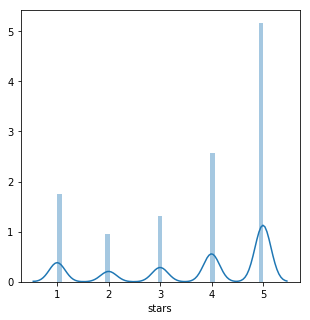

In [18]:
train_stars_data = train_data['stars']
valid_stars_data = valid_data['stars']

print("TRAIN STARS DATA")
print("MAX: %d, MIN: %d" % (np.max(train_stars_data), np.min(train_stars_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_stars_data), np.std(train_stars_data)))
print()

print("Proportion of Stars in Valid")
unique, counts = np.unique(valid_stars_data, return_counts=True)
count = dict(zip(unique, counts))
for key in count.keys():
    print("Proportion of %d: %f" % (key, count[key] / len(valid_stars_data)))

print()
print("Proportion of Stars in Train")
unique, counts = np.unique(train_stars_data, return_counts=True)
count = dict(zip(unique, counts))
for key in count.keys():
    print("Proportion of %d: %.3f" % (key, count[key] / len(train_stars_data)))
fig, axs = plt.subplots(figsize=(5, 5), ncols=1)
sns.distplot(train_stars_data)

TRAIN USEFUL DATA
MAX: 135, MIN: 0
MEAN: 1.348970, SD: 3.395098

TEST USEFUL DATA
MAX: 100, MIN: 0
MEAN: 1.355100, SD: 3.136368


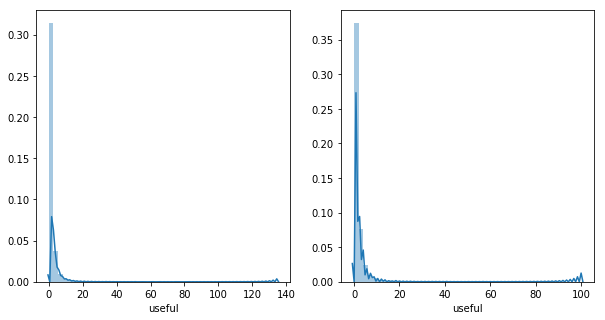

In [19]:
train_useful_data = train_data['useful']
test_useful_data = test_data['useful']

print("TRAIN USEFUL DATA")
print("MAX: %d, MIN: %d" % (np.max(train_useful_data), np.min(train_useful_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_useful_data), np.std(train_useful_data)))
print()
print("TEST USEFUL DATA")
print("MAX: %d, MIN: %d" % (np.max(test_useful_data), np.min(test_useful_data)))
print("MEAN: %f, SD: %f" % (np.mean(test_useful_data), np.std(test_useful_data)))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(train_useful_data, ax=axs[0])
sns.distplot(test_useful_data, ax=axs[1])

TRAIN FUNNY DATA
MAX: 5, MIN: 0
MEAN: 1.038640, SD: 1.487779

TEST FUNNY DATA
MAX: 5, MIN: 0
MEAN: 1.045300, SD: 1.495342


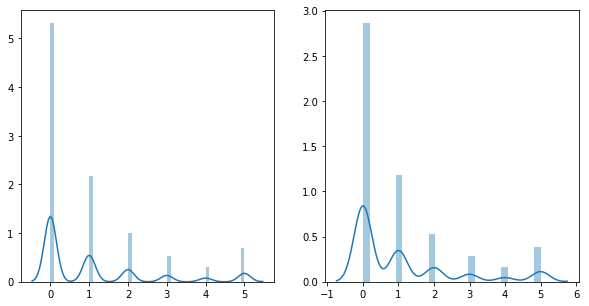

In [20]:
limit = 5
train_useful_data = np.where(train_useful_data > limit, limit, train_useful_data)
test_useful_data = np.where(test_useful_data > limit, limit, test_useful_data)

print("TRAIN FUNNY DATA")
print("MAX: %d, MIN: %d" % (np.max(train_useful_data), np.min(train_useful_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_useful_data), np.std(train_useful_data)))
print()
print("TEST FUNNY DATA")
print("MAX: %d, MIN: %d" % (np.max(test_useful_data), np.min(test_useful_data)))
print("MEAN: %f, SD: %f" % (np.mean(test_useful_data), np.std(test_useful_data)))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(train_useful_data, ax=axs[0])
sns.distplot(test_useful_data, ax=axs[1])

y = -0.136372x + 3.860292


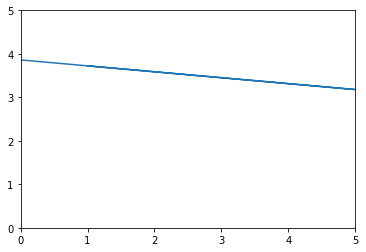

In [21]:
np_x = np.array(train_useful_data)
regr = linear_model.LinearRegression()
regr.fit(train_useful_data.reshape(-1, 1), train_data['stars'])
print("y = %fx + %f" % (regr.coef_, regr.intercept_))

x = train_useful_data
p = np.polyfit(x, train_data['stars'], deg=1)
y = p[1] + p[0] * x
plt.plot(x, y)
plt.xlabel='Useful'
plt.ylabel='Stars'
plt.title = "Stars vs Useful"
plt.axis([0, 5, 0, 5])
plt.show()

In [22]:
def tokenize(text):
    """
    :param text: a doc with multiple sentences, type: str
    return a word list, type: list
    https://textminingonline.com/dive-into-nltk-part-ii-sentence-tokenize-and-word-tokenize
    e.g.
    Input: 'It is a nice day. I am happy.'
    Output: ['it', 'is', 'a', 'nice', 'day', 'i', 'am', 'happy']
    """
    tokens = []
    for word in nltk.word_tokenize(text):
        word = word.lower()
        if word not in stop_words and not word.isnumeric():
            tokens.append(word)
    return tokens

stop_words = set(stopwords.words('english') + list(string.punctuation))

In [23]:
train_text_data = train_data['text'].apply(tokenize).apply(len)
test_text_data = test_data['text'].apply(tokenize).apply(len)

print("TRAIN TEXT DATA")
print("MAX LENGTH: %d, MIN: %d" % (np.max(train_text_data), np.min(train_text_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_text_data), np.std(train_text_data)))
print()
print("TEST TEXT DATA")
print("MAX: %d, MIN: %d" % (np.max(test_text_data), np.min(test_text_data)))
print("MEAN: %f, SD: %f" % (np.mean(test_text_data), np.std(test_text_data)))

TRAIN TEXT DATA
MAX LENGTH: 769, MIN: 0
MEAN: 58.093860, SD: 53.804226

TEST TEXT DATA
MAX: 555, MIN: 1
MEAN: 57.894400, SD: 52.969588


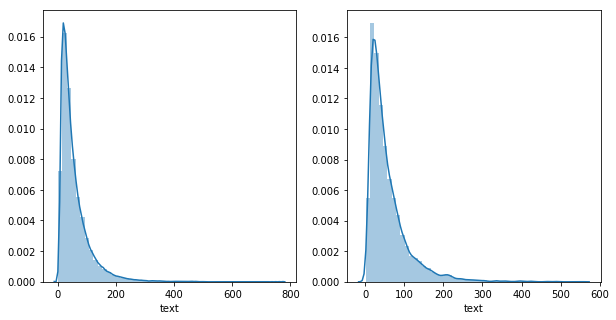

In [24]:
fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(train_text_data, ax=axs[0])
sns.distplot(test_text_data, ax=axs[1])

TRAIN FUNNY DATA
MAX: 250, MIN: 0
MEAN: 57.084020, SD: 48.649009

TEST FUNNY DATA
MAX: 250, MIN: 1
MEAN: 57.011900, SD: 48.469743


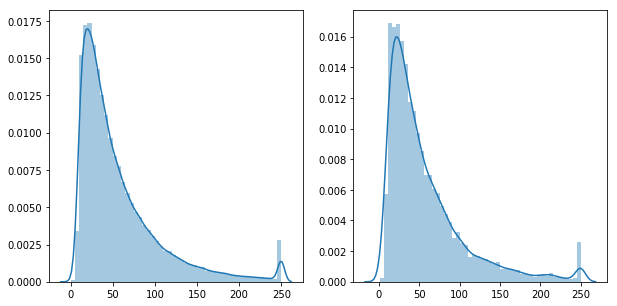

In [25]:
limit = 250
train_text_data = np.where(train_text_data > limit, limit, train_text_data)
test_text_data = np.where(test_text_data > limit, limit, test_text_data)
print("TRAIN FUNNY DATA")
print("MAX: %d, MIN: %d" % (np.max(train_text_data), np.min(train_text_data)))
print("MEAN: %f, SD: %f" % (np.mean(train_text_data), np.std(train_text_data)))
print()
print("TEST FUNNY DATA")
print("MAX: %d, MIN: %d" % (np.max(test_text_data), np.min(test_text_data)))
print("MEAN: %f, SD: %f" % (np.mean(test_text_data), np.std(test_text_data)))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(train_text_data, ax=axs[0])
sns.distplot(test_text_data, ax=axs[1])

TRAIN FUNNY DATA
MAX: 5.525453, MIN: 0.000000
MEAN: 3.767723, SD: 0.765343

TEST FUNNY DATA
MAX: 5.525453, MIN: 0.693147
MEAN: 3.767233, SD: 0.765518


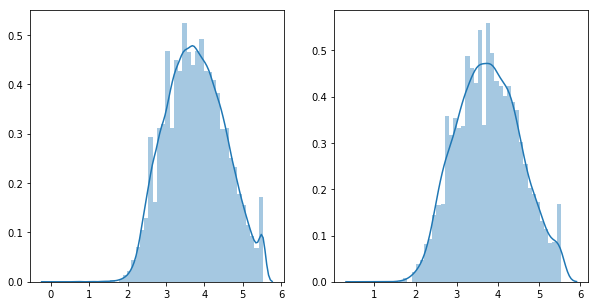

In [27]:
train_text_data_log = np.log1p(train_text_data)
test_text_data_log = np.log1p(test_text_data)

print("TRAIN FUNNY DATA")
print("MAX: %f, MIN: %f" % (np.max(train_text_data_log), np.min(train_text_data_log)))
print("MEAN: %f, SD: %f" % (np.mean(train_text_data_log), np.std(train_text_data_log)))
print()
print("TEST FUNNY DATA")
print("MAX: %f, MIN: %f" % (np.max(test_text_data_log), np.min(test_text_data_log)))
print("MEAN: %f, SD: %f" % (np.mean(test_text_data_log), np.std(test_text_data_log)))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(train_text_data_log, ax=axs[0])
sns.distplot(test_text_data_log, ax=axs[1])

y = -0.390123x + 5.188525


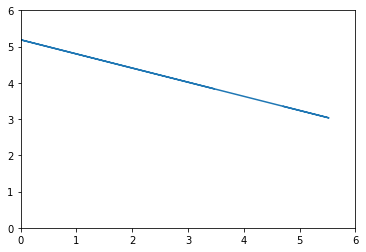

In [38]:
regr = linear_model.LinearRegression()
regr.fit(train_text_data_log.reshape(-1, 1), train_data['stars'])
print("y = %fx + %f" % (regr.coef_, regr.intercept_))

x = train_text_data_log
p = np.polyfit(x, train_data['stars'], deg=1)
y = p[1] + p[0] * x
plt.plot(x, y)
plt.xlabel='Text Length'
plt.ylabel='Stars'
plt.title = "Stars vs Text Length"
plt.axis([0, 6, 0, 6])
plt.show()

y = -0.005802x + 4.049828


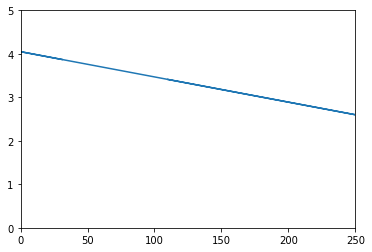

In [39]:
regr = linear_model.LinearRegression()
regr.fit(train_text_data.reshape(-1, 1), train_data['stars'])
print("y = %fx + %f" % (regr.coef_, regr.intercept_))

x = train_text_data
p = np.polyfit(x, train_data['stars'], deg=1)
y = p[1] + p[0] * x
plt.plot(x, y)
plt.xlabel='Text Length'
plt.ylabel='Stars'
plt.title = "Stars vs Text Length"
plt.axis([0, 250, 0, 5])
plt.show()